**Group - 03 Assignment by Gaurav Kudeshia & Anurodh Singh**

**Assignment-2: Exploring Convolutional Neural Networks (CNNs)**

The primary aim of this assignment is to explore the capabilities of Convolutional Neural Networks in identifying and classifying objects within images. Students will engage in practical application of CNNs on image datasets, leveraging pre-trained models to evaluate their effectiveness and performance.

In [1]:
!unzip -/fs/ess/PGS0341/BA_64061_KSU_SEC1/data/dogs-vs-cats.zip

UnZip 6.00 of 20 April 2009, by Info-ZIP.  Maintained by C. Spieler.  Send
bug reports using http://www.info-zip.org/zip-bug.html; see README for details.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files

In [2]:
!unzip -o -qq /fs/ess/PGS0341/BA_64061_KSU_SEC1/data/dogs-vs-cats.zip

In [3]:
!unzip -qq/fs/ess/PGS0341/BA_64061_KSU_SEC1/data/dogs-vs-cats train.zip 

UnZip 6.00 of 20 April 2009, by Info-ZIP.  Maintained by C. Spieler.  Send
bug reports using http://www.info-zip.org/zip-bug.html; see README for details.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files

**Q1, Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?**

We're going to build a convolutional neural network from the ground up. Having loaded our dataset, it's time to split it into distinct subsets for training, validation, and testing. For this project, we'll allocate 1,000 images for training purposes, 500 images for validation, and another 500 images will be used for the test set.

Organizing the Dataset into Training, Validation, and Testing Groups



In [4]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src = original_dir / fname  
            dst = dir / fname  
            shutil.copyfile(src, dst)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)


### Constructing the Model

For this network, we begin by processing images, represented as 3D tensors, which are initially reshaped. The process involves applying convolution operations using a 3x3 window (referred to as kernel_size), followed by max pooling operations with a 2x2 window (known as pool_size).

The objective of this task is to categorize the images into two classes: "cat" or "dog". To achieve this, the architecture incorporates a dense layer towards the end, which plays a crucial role in determining the classification of the output as either "cat" or "dog". This classification is facilitated by a single output node corresponding to these categories. Before reaching the dense layer, it's necessary to transform the 3D tensor structure into a 1D format, a step accomplished by introducing a flattening layer.

**Creating a Compact Convolutional Network for Cat vs. Dog Classification**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

**Setting Up the Model for Training**

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

- Performed Data preprocessing process of cleaning and organizing raw data to make it suitable for analysis or modeling

**Reading Images with image_dataset_from_directory**

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [10]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [11]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [12]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Showing the Dimensions of Data and Labels Provided by the Dataset**

In [13]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Training the Model with a Dataset**

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/25
63/63 [==============================] - 45s 704ms/step - loss: 0.7334 - accuracy: 0.5230 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/25
63/63 [==============================] - 44s 698ms/step - loss: 0.6945 - accuracy: 0.5090 - val_loss: 0.6858 - val_accuracy: 0.6290
Epoch 3/25
63/63 [==============================] - 44s 695ms/step - loss: 0.6947 - accuracy: 0.6055 - val_loss: 0.6708 - val_accuracy: 0.5700
Epoch 4/25
63/63 [==============================] - 43s 687ms/step - loss: 0.6471 - accuracy: 0.6425 - val_loss: 0.6278 - val_accuracy: 0.6490
Epoch 5/25
63/63 [==============================] - 44s 695ms/step - loss: 0.5958 - accuracy: 0.6925 - val_loss: 0.6844 - val_accuracy: 0.5950
Epoch 6/25
63/63 [==============================] - 44s 695ms/step - loss: 0.5815 - accuracy: 0.7025 - val_loss: 0.6396 - val_accuracy: 0.6790
Epoch 7/25
63/63 [==============================] - 44s 692ms/step - loss: 0.5408 - accuracy: 0.7375 - val_loss: 1.0853 - val_accuracy: 0.5790

**Visualizing Training Loss and Accuracy Curves**

- This code plots training and validation accuracy and loss over epochs for a model's training process, using matplotlib for visualization, with distinct colors to differentiate between training and validation metrics.

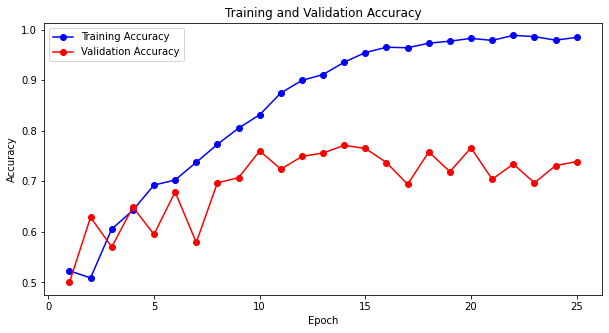

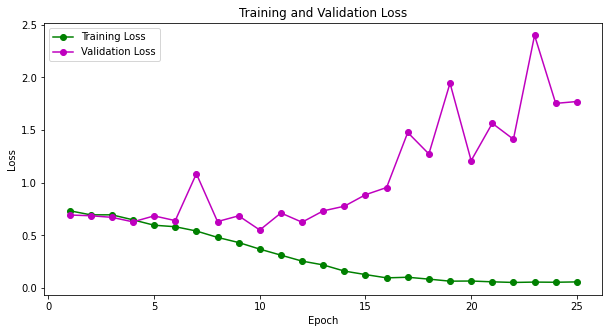

In [15]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(10, 5)) 
plt.plot(epochs, accuracy, "bo-", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "ro-", label="Validation Accuracy") 
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10, 5)) 
plt.plot(epochs, loss, "go-", label="Training Loss") 
plt.plot(epochs, val_loss, "mo-", label="Validation Loss")  
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")  
plt.ylabel("Loss")  
plt.legend()
plt.show()

**Assessing the model's performance using the test dataset.**

In [16]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 158ms/step - loss: 0.5856 - accuracy: 0.7230
Test accuracy: 0.723


**The model's validation and test accuracy currently stands at a relatively low 73%.**
- To enhance the model's performance, we plan to implement several strategies, including:

a) Data Augmentation

b) Dropout Technique

c) A combination of Data Augmentation and the Dropout Technique

### a, By employing data augmentation

**Implement a Data Augmentation Stage for an Image Processing Model**

In [17]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

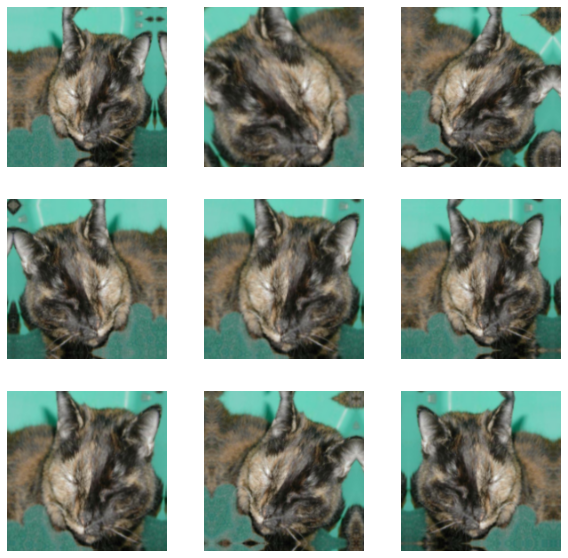

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Q2. Increasing Training sample size to 2870 samples**

In [19]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_01")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src = original_dir / fname  
            dst = dir / fname  
            shutil.copyfile(src, dst)

make_subset("train", start_index=0, end_index=1870)
make_subset("validation", start_index=1870, end_index=2370)
make_subset("test", start_index=2370, end_index=2870)


**Defining a new convnet that includes image augmentation and dropout**

In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=35,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/35
63/63 [==============================] - 45s 722ms/step - loss: 0.6907 - accuracy: 0.5510 - val_loss: 0.7387 - val_accuracy: 0.5110
Epoch 2/35
63/63 [==============================] - 45s 721ms/step - loss: 0.6913 - accuracy: 0.5815 - val_loss: 0.9297 - val_accuracy: 0.5100
Epoch 3/35
63/63 [==============================] - 45s 722ms/step - loss: 0.6571 - accuracy: 0.6095 - val_loss: 0.6376 - val_accuracy: 0.6360
Epoch 4/35
63/63 [==============================] - 46s 723ms/step - loss: 0.6472 - accuracy: 0.6450 - val_loss: 0.5952 - val_accuracy: 0.6810
Epoch 5/35
63/63 [==============================] - 46s 722ms/step - loss: 0.6470 - accuracy: 0.6610 - val_loss: 0.6258 - val_accuracy: 0.6370
Epoch 6/35
63/63 [==============================] - 45s 722ms/step - loss: 0.6066 - accuracy: 0.6795 - val_loss: 0.5720 - val_accuracy: 0.6860
Epoch 7/35
63/63 [==============================] - 46s 723ms/step - loss: 0.5778 - accuracy: 0.6950 - val_loss: 0.6102 - val_accuracy: 0.6630

**Assessment of the Model Using the Test Data**

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 156ms/step - loss: 0.4613 - accuracy: 0.8060
Test accuracy: 0.806


**Q3. Increasing Training sample size to 3100 samples**

The number of training samples has been expanded to 3100, and the impact on model performance is discussed in the provided summary.

In [24]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_02")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src = original_dir / fname 
            dst = dir / fname  
            shutil.copyfile(src, dst)

make_subset("train", start_index=0, end_index=2100)
make_subset("validation", start_index=2100, end_index=2600)
make_subset("test", start_index=2600, end_index=3100)


Defining a new convnet that includes image augmentation and dropout

In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Now, we proceed to train the convnet that has been regularized.**

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 47s 738ms/step - loss: 0.7166 - accuracy: 0.4935 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 46s 730ms/step - loss: 0.7024 - accuracy: 0.5295 - val_loss: 0.7651 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 46s 727ms/step - loss: 0.6912 - accuracy: 0.5735 - val_loss: 0.6773 - val_accuracy: 0.5280
Epoch 4/30
63/63 [==============================] - 46s 722ms/step - loss: 0.6817 - accuracy: 0.5725 - val_loss: 0.7610 - val_accuracy: 0.5180
Epoch 5/30
63/63 [==============================] - 45s 718ms/step - loss: 0.6530 - accuracy: 0.6135 - val_loss: 0.6120 - val_accuracy: 0.6490
Epoch 6/30
63/63 [==============================] - 46s 724ms/step - loss: 0.6345 - accuracy: 0.6365 - val_loss: 0.5809 - val_accuracy: 0.7000
Epoch 7/30
63/63 [==============================] - 46s 722ms/step - loss: 0.6238 - accuracy: 0.6535 - val_loss: 0.6259 - val_accuracy: 0.6430

**Evaluating the test dataset**

In [27]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 153ms/step - loss: 0.5019 - accuracy: 0.7725
Test accuracy: 0.772


**Q4.Fine Tuning of the pretrained models**

We will adjust the pretrained model by experimenting with various sizes of training samples and then assess its effectiveness based on the performance of the models we previously constructed.

**Pre-Trained Model with 1000 Training Samples**

Initializing the VGG16 convolutional base and setting it to a non-trainable state

**Instantiating the VGG16 convolutional base**

In [28]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [31]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [32]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [34]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=130,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/130
63/63 [==============================] - 2s 33ms/step - loss: 15.4349 - accuracy: 0.9265 - val_loss: 3.4968 - val_accuracy: 0.9750
Epoch 2/130
63/63 [==============================] - 2s 32ms/step - loss: 4.0122 - accuracy: 0.9700 - val_loss: 5.3281 - val_accuracy: 0.9660
Epoch 3/130
63/63 [==============================] - 2s 32ms/step - loss: 1.1995 - accuracy: 0.9895 - val_loss: 5.2322 - val_accuracy: 0.9690
Epoch 4/130
63/63 [==============================] - 2s 32ms/step - loss: 1.2835 - accuracy: 0.9875 - val_loss: 6.7933 - val_accuracy: 0.9650
Epoch 5/130
63/63 [==============================] - 2s 32ms/step - loss: 1.4363 - accuracy: 0.9910 - val_loss: 6.3728 - val_accuracy: 0.9720
Epoch 6/130
63/63 [==============================] - 2s 32ms/step - loss: 0.7145 - accuracy: 0.9950 - val_loss: 6.0059 - val_accuracy: 0.9680
Epoch 7/130
63/63 [==============================] - 2s 32ms/step - loss: 0.5798 - accuracy: 0.9935 - val_loss: 4.9726 - val_accuracy: 0.9720
Epoch

**Plotting the results**

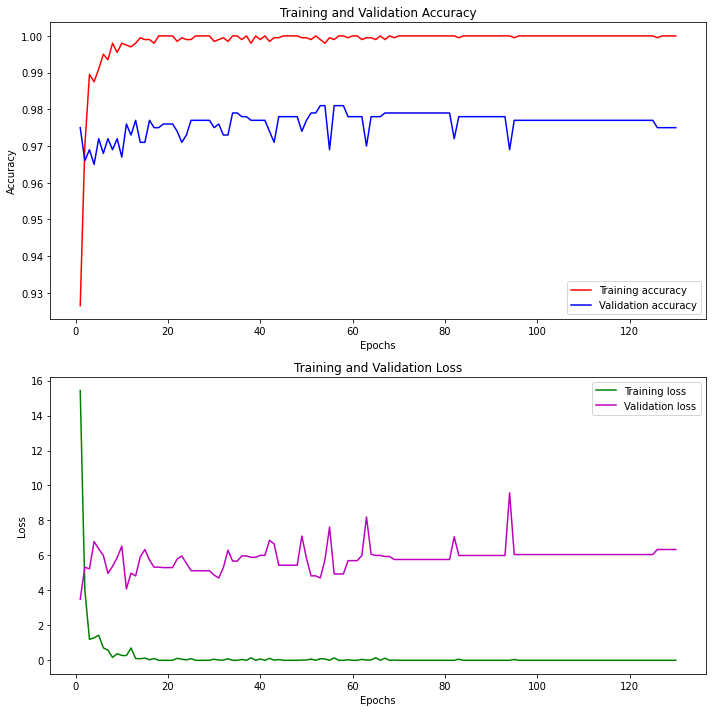

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'g', label='Training loss')
ax2.plot(epochs, val_loss, 'm', label='Validation loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [36]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [37]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [38]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 165s 3s/step - loss: 5.6375 - accuracy: 0.9620 - val_loss: 4.9509 - val_accuracy: 0.9720
Epoch 2/5
63/63 [==============================] - 165s 3s/step - loss: 4.8123 - accuracy: 0.9600 - val_loss: 5.8528 - val_accuracy: 0.9680
Epoch 3/5
63/63 [==============================] - 165s 3s/step - loss: 4.4011 - accuracy: 0.9670 - val_loss: 5.7027 - val_accuracy: 0.9720
Epoch 4/5
63/63 [==============================] - 165s 3s/step - loss: 3.9860 - accuracy: 0.9690 - val_loss: 3.9207 - val_accuracy: 0.9720
Epoch 5/5
63/63 [==============================] - 165s 3s/step - loss: 3.7545 - accuracy: 0.9710 - val_loss: 5.4095 - val_accuracy: 0.9670


**Evaluating the model on the test set**

In [43]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 107s 2s/step - loss: 4.2241 - accuracy: 0.9745
Test accuracy: 0.975


### Fine-tuning a pretrained model

In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [45]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 192s 3s/step - loss: 2.4510 - accuracy: 0.9765 - val_loss: 3.3270 - val_accuracy: 0.9800
Epoch 2/5
63/63 [==============================] - 190s 3s/step - loss: 0.7606 - accuracy: 0.9915 - val_loss: 3.2980 - val_accuracy: 0.9780
Epoch 3/5
63/63 [==============================] - 190s 3s/step - loss: 1.0761 - accuracy: 0.9850 - val_loss: 3.1059 - val_accuracy: 0.9810
Epoch 4/5
63/63 [==============================] - 191s 3s/step - loss: 0.8716 - accuracy: 0.9840 - val_loss: 3.0539 - val_accuracy: 0.9770
Epoch 5/5
63/63 [==============================] - 190s 3s/step - loss: 0.8123 - accuracy: 0.9885 - val_loss: 3.0518 - val_accuracy: 0.9790


In [47]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 107s 2s/step - loss: 2.4981 - accuracy: 0.9735
Test accuracy: 0.974


**Pre-Trained Model - 5000 Training samples**

Instantiating and freezing the VGG16 convolutional base

In [48]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [49]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [50]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 192s 3s/step - loss: 3.4654 - accuracy: 0.7505 - val_loss: 0.7099 - val_accuracy: 0.9180
Epoch 2/5
63/63 [==============================] - 192s 3s/step - loss: 1.1883 - accuracy: 0.8600 - val_loss: 0.3784 - val_accuracy: 0.9470
Epoch 3/5
63/63 [==============================] - 191s 3s/step - loss: 0.6065 - accuracy: 0.9110 - val_loss: 0.2704 - val_accuracy: 0.9570
Epoch 4/5
63/63 [==============================] - 191s 3s/step - loss: 0.3379 - accuracy: 0.9245 - val_loss: 0.2123 - val_accuracy: 0.9580
Epoch 5/5
63/63 [==============================] - 191s 3s/step - loss: 0.2489 - accuracy: 0.9395 - val_loss: 0.1800 - val_accuracy: 0.9580


In [51]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 107s 2s/step - loss: 0.1697 - accuracy: 0.9700
Test accuracy: 0.970


**Pre-Trained Model - 10000 samples**

Instantiating and freezing the VGG16 convolutional base

In [52]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [53]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [54]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 192s 3s/step - loss: 4.1675 - accuracy: 0.7425 - val_loss: 0.8961 - val_accuracy: 0.9120
Epoch 2/5
63/63 [==============================] - 191s 3s/step - loss: 1.0275 - accuracy: 0.8720 - val_loss: 0.5272 - val_accuracy: 0.9480
Epoch 3/5
63/63 [==============================] - 192s 3s/step - loss: 0.7030 - accuracy: 0.9010 - val_loss: 0.3709 - val_accuracy: 0.9510
Epoch 4/5
63/63 [==============================] - 192s 3s/step - loss: 0.3906 - accuracy: 0.9170 - val_loss: 0.2823 - val_accuracy: 0.9540
Epoch 5/5
63/63 [==============================] - 192s 3s/step - loss: 0.2492 - accuracy: 0.9360 - val_loss: 0.2759 - val_accuracy: 0.9600


**Code plots training and validation accuracy and loss side by side in a single figure using Matplotlib. It uses different colors and markers to distinguish between training and validation metrics, enhancing visualization and comparison across training epochs.**

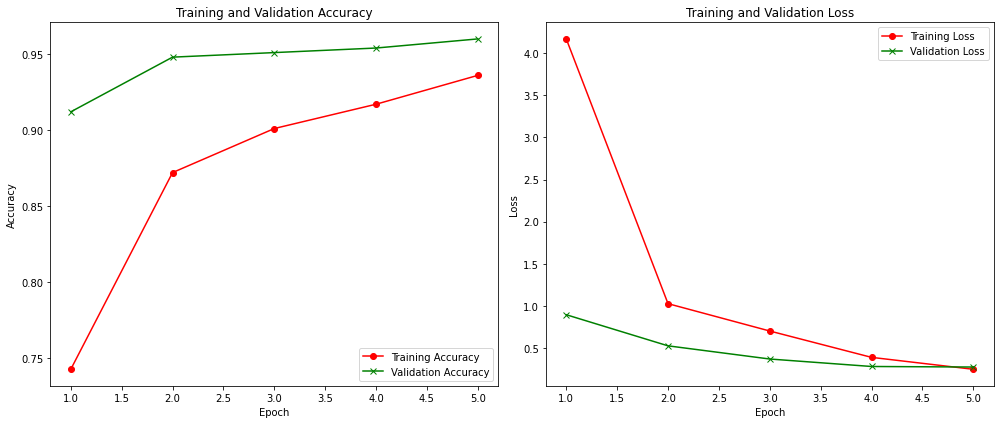

In [55]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) 
plt.plot(epochs, accuracy, 'r-', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, 'g-', label='Validation Accuracy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2) 
plt.plot(epochs, loss, 'r-', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, 'g-', label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:

model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 107s 2s/step - loss: 0.1968 - accuracy: 0.9575
Test accuracy: 0.957
